<a href="https://colab.research.google.com/github/hyeong777/Python-Quest/blob/main/%EA%B0%80%EC%9C%84%EB%B0%94%EC%9C%84%EB%B3%B4(%EC%B5%9C%EC%A2%85).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.12.0
1.22.4


In [26]:
from PIL import Image
import glob
import os

In [38]:
def resize_images(img_path):
    images=glob.glob(img_path + "*.jpg")

    print(len(images), "images to be resized.")

    target_size=(28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")


# 가위 이미지 resize
image_dir_path = "/content/drive/MyDrive/Colab Notebooks/scissor_rock/scissor/"
resize_images(image_dir_path)

# 바위 이미지 resize
image_dir_path = "/content/drive/MyDrive/Colab Notebooks/scissor_rock/rock/"
resize_images(image_dir_path)

# 보 이미지 resize
image_dir_path = "/content/drive/MyDrive/Colab Notebooks/scissor_rock/paper/"
resize_images(image_dir_path)

100 images to be resized.
100  images resized.
100 images to be resized.
100  images resized.
100 images to be resized.
100  images resized.


In [39]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/drive/MyDrive/Colab Notebooks/scissor_rock"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  2


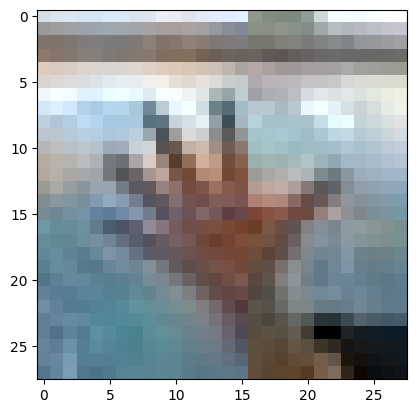

In [40]:
import matplotlib.pyplot as plt

plt.imshow(x_train[250])
print('라벨: ', y_train[250])

In [67]:
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 800)               0         
                                                                 
 dense_10 (Dense)            (None, 32)               

In [68]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(x_train, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 1s 18ms/step - loss: 40.0196 - accuracy: 0.3100
Epoch 2/10
10/10 [==============================] - 0s 18ms/step - loss: 12.0569 - accuracy: 0.4333
Epoch 3/10
10/10 [==============================] - 0s 17ms/step - loss: 1.6001 - accuracy: 0.6633
Epoch 4/10
10/10 [==============================] - 0s 19ms/step - loss: 0.5413 - accuracy: 0.8167
Epoch 5/10
10/10 [==============================] - 0s 18ms/step - loss: 0.1969 - accuracy: 0.9367
Epoch 6/10
10/10 [==============================] - 0s 19ms/step - loss: 0.0445 - accuracy: 0.9900
Epoch 7/10
10/10 [==============================] - 0s 18ms/step - loss: 0.0185 - accuracy: 0.9933
Epoch 8/10
10/10 [==============================] - 0s 19ms/step - loss: 0.0169 - accuracy: 0.9967
Epoch 9/10
10/10 [==============================] - 0s 17ms/step - loss: 0.0134 - accuracy: 0.9967
Epoch 10/10
10/10 [==============================] - 0s 20ms/step - loss: 0.0066 - accuracy: 1.0000


In [69]:
image_dir_path =  "/content/drive/MyDrive/Colab Notebooks/rock_scissor_paper_test/scissor/"
resize_images(image_dir_path)

image_dir_path =  "/content/drive/MyDrive/Colab Notebooks/rock_scissor_paper_test/rock/"
resize_images(image_dir_path)

image_dir_path = "/content/drive/MyDrive/Colab Notebooks/rock_scissor_paper_test/paper/"
resize_images(image_dir_path)

image_dir_path =  "/content/drive/MyDrive/Colab Notebooks/rock_scissor_paper_test/"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100 images to be resized.
100  images resized.
100 images to be resized.
100  images resized.
100 images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [70]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 2.1661 - accuracy: 1.0000 - 324ms/epoch - 32ms/step
test_loss: 2.166128158569336
test_accuracy: 1.0


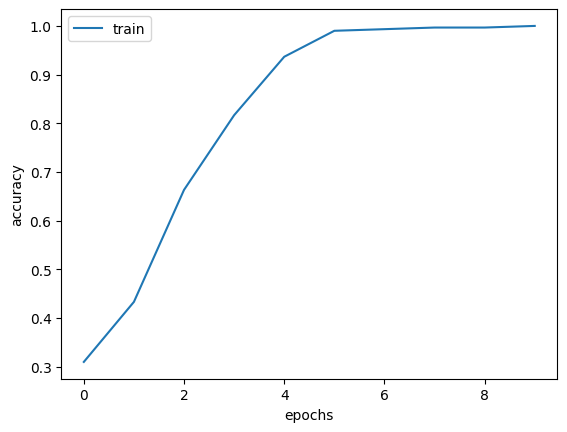

In [71]:
plt.plot(history.history['accuracy'], label='train')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

In [64]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 0.9903 - accuracy: 1.0000 - 232ms/epoch - 23ms/step
test_loss: 0.9902971386909485
test_accuracy: 1.0
